In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Q.21 ヒストグラム正規化

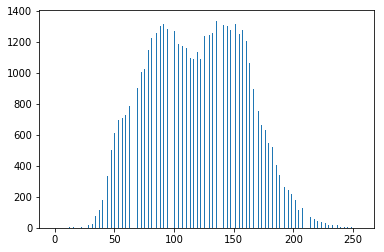

In [4]:
def hist_norm(img, a=0, b=255):
    c = img.min()
    d = img.max()
    
    output = img.copy()
    
    output = (b-a) / (d-c) * (output - c) + a
    output[img < a] = a
    output[img > b] = b
    
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori_dark.jpg").astype(np.float)
img = hist_norm(img)
cv2.imwrite("answers/answer21_1.jpg", img)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("answers/answer21_2.jpg")
plt.show()

# Q.22 ヒストグラム操作

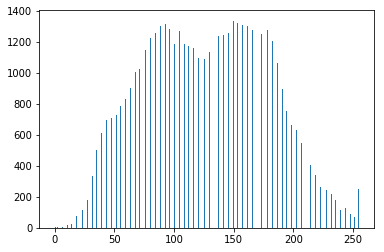

In [12]:
def hist_mani(img, m0=128, s0=52):
    m = np.mean(img)
    s = np.std(img)
    
    output = img.copy()
    
    output = s0 / s * (img - m) + m0
    output = np.clip(output, 0, 255)
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori_dark.jpg").astype(np.float)
img = hist_mani(img)
cv2.imwrite("answers/answer22_1.jpg", img)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("answers/answer22_2.jpg")
plt.show()

# Q.23 ヒストグラム平坦化

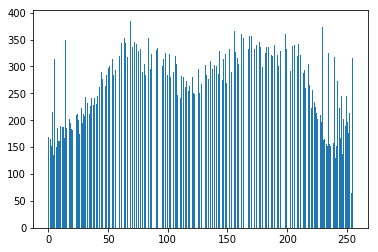

In [23]:
def hist_heitan(img, z_max=255):
    H, W, C = img.shape
    S = H * W * C
    
    output = img.copy()
    
    sum_h = 0
    for i in range(1, 255):
        sum_h += len(img[np.where(img == i)])
        z_ = z_max / S * sum_h
        output[np.where(img == i)] = z_
        
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg").astype(np.float)
img = hist_heitan(img)
cv2.imwrite("answers/answer23_1.jpg", img)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("answers/answer23_2.jpg")
plt.show()

# Q.24 ガンマ補正

In [25]:
def gamma_correct(img, c=1, g=2.2):
    output = img.copy()
    
    output /= 255
    output = (1 / c * output) ** (1 / g)
    output *= 255
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori_gamma.jpg").astype(np.float)
img = gamma_correct(img)
cv2.imwrite("answers/answer24.jpg", img)

True

# Q.25最近傍補間

In [34]:
def nearest_neighbor(img, a=1.5):
    H, W, C = img.shape
    
    output = np.zeros((int(H*a), int(W*a), C), dtype=np.float)
    
    for y in range(int(H*a)):
        for x in range(int(W*a)):
            output[y, x] = img[int(np.round(y/a)), int(np.round(x/a))]
            
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg").astype(np.float)
img = nearest_neighbor(img)

print(img.shape)

cv2.imwrite("answers/answer25.jpg", img)

(192, 192, 3)


True

# Q.26 Bi-linear補間

# Q.27 Bi-cubic補間

# Q.28 アフィン変換(平行移動)

# Q.29 アフィン変換(拡大縮小)

# Q.30 アフィン変換(回転)